# Sistemas Mecánicos

## Gas confinado a un recipiente cerrado

Las cambios de presión $P$ de un gas dentro de un tanque se describe por la siguiente ecuación diferencial

$$
 \dot{P} = - \frac{RTK_{0}A_0}{V}\sqrt{P_{0}\left( P - P_{0} \right)} + \frac{RT}{V}u,
$$
donde $u$ es el volumen de gas por unidad de tiempo, $A_{0}$ la constante relacionada con la válvula de entrada, $K_{0}$ la constante del gas considerado, $R$ la constante universal de los gases, $T$ la temperatura del proceso y $V$ el volúmen del recipiente. Además, el punto de equlibrio de la presión es $P=P_{0}$.

El punto de equilibrio para la presión es

$$
 P(u^{\star}) = P_{0} + \frac{1}{P_{0}}\left( \frac{u^{\star}}{K_{0}A_{0}} \right)^{2}.
$$

## Sistema de nivel de líquido en tanques en cascada

Considere dos tanques en cascada como se muestra en la siguiente imagen

```{figure} images/two_tanks_system.png
---
height: 300px
name: fig:two_tanks_system
---
Sistema de dos tanques en cascada.
```

cuyo modelo dinámico que describe el nivel de líquido está dado como sigue

$$
 \begin{aligned}
  \frac{\mathrm{d}h_{1}}{\mathrm{d}t} &= \frac{1}{A_{1}}u - \frac{k_{1}}{A_{1}}\sqrt{gh_{1}}, \\
  \frac{\mathrm{d}h_{1}}{\mathrm{d}t} &= \frac{k_{1}}{A_{1}}\sqrt{gh_{1}}  - \frac{k_{2}}{A_{2}}\sqrt{gh_{2}}, \\
  y &= h_{2},
 \end{aligned}
$$ (eqn:tanks)

donde $u:=q_{i}$ denota el caudal de entrada, $q_{m}:= \frac{k_{1}}{A_{1}}\sqrt{gh_{1}}$ la entrada del segundo tanque y $q_{o}:=\frac{k_{2}}{A_{2}}\sqrt{gh_{2}}$ el flujo de salida. Además, $A_{i}$, $k_{i},~i=1,2$ las secciones de los tanques y sus respectivos coeficientes de pérdida.



### Puntos de equilibrio

Para obtener los puntos de equilibrio del sistema {eq}`eqn:tanks`, podemos utilizar la librería `sympy` de Python.

In [1]:
import sympy as sym

from sympy import init_session
init_session(quiet=True)

In [2]:
A1 = sym.Symbol('A1')
A2 = sym.Symbol('A2')
k1 = sym.Symbol('k1')
k2 = sym.Symbol('k2')
g = sym.Symbol('g')
u = sym.Symbol('u')

h1 = sym.Symbol('h1')
h2 = sym.Symbol('h2')

In [3]:
f1 = u/A1 - (k1/A1)*sym.sqrt(g*h1)
f2 = (k1/A2)*sym.sqrt(g*h1) - (k2/A2)*sym.sqrt(g*h2)

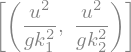

In [4]:
E = sym.solve((f1, f2), (h1, h2))
E

### Linealización del sistema

Una vez encontrados los puntos de equilibrio, podemos calcular la matriz Jacobiana como sigue

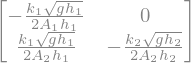

In [5]:
J = sym.Matrix([[sym.diff(f1, h1), sym.diff(f1, h2)],
                [sym.diff(f2, h1), sym.diff(f2, h2)]])
J

In [6]:
# Generamos una funcion lambda a partir de la expresion simbolica anterior
J = sym.lambdify([A1, A2, k1, k2, g, u, h1, h2], J)

In [7]:
# Considere los siguientes parametros
A1 = 0.2 # [m²] (Sección del tanque 1)
A2 = 0.5 # [m²] (Sección del tanque 2)
k1 = 0.0032 # [m³/s / m1/2]. (Coeficiente de pérdida 1)
k2 = 0.0036 # [m³/s / m1/2]. (Coeficiente de pérdida 2)
g = 9.81 # Aceleración de gravedad
u = 0.01 # [m³/s]. (Caudal de entrada)

h1_eq = (u**2)/(g*k1**2)
h2_eq = (u**2)/(g*k2**2)

print(h1_eq, h2_eq)

0.9954765545361874 0.7865493764236544


In [8]:
print(J(A1, A2, k1, k2, g, u, h1_eq, h2_eq))

[[-0.0251136   0.        ]
 [ 0.01004544 -0.01271376]]


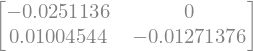

In [9]:
a11 = -k1*sym.sqrt(g*h1_eq)/(2*A1*h1_eq)
a12 = 0
a21 = k1*sym.sqrt(g*h1_eq)/(2*A2*h1_eq)
a22 = -k2*sym.sqrt(g*h2_eq)/(2*A2*h2_eq)

A = sym.Matrix([[a11, a12],
                [a21, a22]])
A

# Sistemas electromecánicos

## Sistema de levitación magnética

Una esfera metálica de masa $m$ se mantiene suspendida en el aire mediante un sistema de levitación magnética dado por el siguiente sistema

$$
 \begin{aligned}
  \dot{x}_{1} &= x_{2}, \\
  \dot{x}_{1} &= g - \frac{c}{m}\frac{x_{3}^{2}}{x_{1}}, \\
  \dot{x}_{1} &= -\frac{R}{L}x_{3} + \frac{1}{L}u,\\
  y &= x_{1},
 \end{aligned}
$$

donde $x_{3}$ representa la corriente del circuito, $x_{1}$ el desplanzamiento de la esfera desde el electromagneto, $x_{2}$ la variación del desplazamiento. Además, $u$ es la tensión aplicada al circuito que también actúa como variable de control.

### Puntos de equilibrio

Los puntos de equilibrio del sistema se obtienen como sigue

In [10]:
x1, x2, x3, g, c, m, R, L, u = sym.symbols('x1, x2, x3, g, c, m, R, L, u')

In [11]:
f1 = x2
f2 = g - (c/m)*(x3**2/x1)
f3 = -(R/L)*x3 + u/L

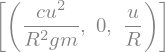

In [12]:
E = sym.solve((f1, f2, f3), (x1, x2, x3))
E

In [13]:
E = sym.lambdify([c,u,R,g,m], E)

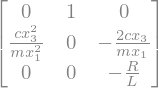

In [14]:
F = sym.Matrix([f1, f2, f3])
X = sym.Matrix([x1, x2, x3])
J = F.jacobian(X)
J

In [15]:
# Generamos una funcion lambda a partir de la expresion simbolica anterior
J = sym.lambdify([c, m, R, L, x1, x2, x3], J)

In [16]:
# m = 0.05 # Mass of the ball [Kg]
# g = 9.81 # Gravity [m/s²]
# R = 10 # [Ω]
# c = 0.0049 # [Hm]
# L = 0.060 # [H]
# u = 1 # 0 < u < 10V

m = 0.1
g = 9.81
c = 1
R = 1
L = 0.01

In [17]:
x1_d = 0.05
u_eq = R*np.sqrt((x1_d*m*g)/c)
u_eq

In [18]:
x1_eq = (c/(m*g))*(u_eq**2/R**2)
x2_eq = 0
x3_eq = u_eq/R

print([x1_eq,x2_eq,x3_eq])

[0.05000000000000001, 0, 0.22147234590350104]


In [19]:
A = J(c, m, R, L, x1_eq, x2_eq, x3_eq)
A

array([[   0.        ,    1.        ,    0.        ],
       [ 196.2       ,    0.        ,  -88.58893836],
       [   0.        ,    0.        , -100.        ]])

In [20]:
from sympy import init_session
init_session(quiet=True)

In [21]:
g, x1, k, m, R, L, s = sym.symbols('g, x1, k, m, R, L, s')

A = sym.Matrix([[0, 1, 0],
                [g/x1, 0, -2*sym.sqrt((k*g)/(m*x1))],
                [0, 0, -R/L]])

sIA = s*sym.eye(3) - A

print(sIA.det())

print(sIA.inv())

(-L*g*s + L*s**3*x1 - R*g + R*s**2*x1)/(L*x1)
Matrix([[s*x1/(-g + s**2*x1), x1/(-g + s**2*x1), -2*L*x1*sqrt(g*k/(m*x1))/(-L*g*s + L*s**3*x1 - R*g + R*s**2*x1)], [g/(-g + s**2*x1), s*x1/(-g + s**2*x1), -2*L*s*x1*sqrt(g*k/(m*x1))/(-L*g*s + L*s**3*x1 - R*g + R*s**2*x1)], [0, 0, 1/(s + R/L)]])
